Importing needed libraries

In [ ]:
import pandas as py
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Downloading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Pattern/archive.zip

Archive:  /content/gdrive/MyDrive/Pattern/archive.zip
  inflating: README                  
  inflating: s1/1.pgm                
  inflating: s1/10.pgm               
  inflating: s1/2.pgm                
  inflating: s1/3.pgm                
  inflating: s1/4.pgm                
  inflating: s1/5.pgm                
  inflating: s1/6.pgm                
  inflating: s1/7.pgm                
  inflating: s1/8.pgm                
  inflating: s1/9.pgm                
  inflating: s10/1.pgm               
  inflating: s10/10.pgm              
  inflating: s10/2.pgm               
  inflating: s10/3.pgm               
  inflating: s10/4.pgm               
  inflating: s10/5.pgm               
  inflating: s10/6.pgm               
  inflating: s10/7.pgm               
  inflating: s10/8.pgm               
  inflating: s10/9.pgm               
  inflating: s11/1.pgm               
  inflating: s11/10.pgm              
  inflating: s11/2.pgm               
  inflating: s11/3.pgm            

 initializing Matrix D With Shape(400x10304)

In [ ]:
temp=np.zeros(10304)
for i in range(1,41):
  for j in range(1,11):
    # Path to the file
    x='/content/s'+str(i)+'/'+str(j)+'.pgm'
    img = Image.open(x)
    # Inserting the data of the image in a matrix
    numpydata = np.asarray(img)
    result = numpydata.flatten()
    temp=np.row_stack((temp,result))
# Deleting the first zeros row
D=temp[1:]
i=1
temp2=np.zeros(10)
# For declaring the labels
while i!=41:
  for j in range(11):
    temp1=np.full(10, i)
  temp2=np.row_stack((temp2,temp1))
  i=i+1
temp2=temp2[1:]
label=np.reshape(temp2.flatten(),(400,1))


Splitting the data even and odd

In [ ]:
Dodd=D[::2]
labelodd=label[::2]
Deven=D[1::2]
labeleven=label[1::2]


**PCA**

Computing the Mean and Covariance

In [ ]:
mean = np.mean(Dodd, axis=0)
Centered=Dodd-mean
centered2=Centered.T
covariance = np.cov(centered2,bias=True)

Computing the Eigen Values and sorting both the eigen values and eigen vectors

In [ ]:
w,v=np.linalg.eigh(covariance)
idx = w.argsort()[::-1]
EigenValues=w[idx]
EigenVectors=v[:,idx]

In [ ]:
U=EigenVectors

Pca Training and Testing

In [ ]:
LabelTrain=labelodd
LabelTest=labeleven

def PCA(alpha,Centered,U,EigenValues,k):
  sumEigen=np.sum(EigenValues)
  percentage=0
  sum=0
  i=0;
  # Computing the Threshold (i)
  while(alpha>=percentage):
    sum=sum+EigenValues[i]
    percentage=sum/sumEigen
    i=i+1
  # The EigenVectors where the test and trai samples will be projected at (U)
  projected=U[:,0:i]
  # Projection of The Train Set
  Xtrain=np.dot(projected.T,Centered.T).T
  mean = np.mean(Deven, axis=0)
  CenteredTest=Deven-mean
  #Projection of the test set
  Xtest=np.dot(projected.T,CenteredTest.T).T
  X_train = Xtrain
  X_test = Xtest
  # Number of N neighbours
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(X_train, LabelTrain.ravel())
  y_pred = classifier.predict(Xtest)
  score = metrics.accuracy_score(LabelTest,y_pred)
  result = metrics.confusion_matrix(LabelTest, y_pred)
  return score


Testing different values of alphas and plotting the accuracy

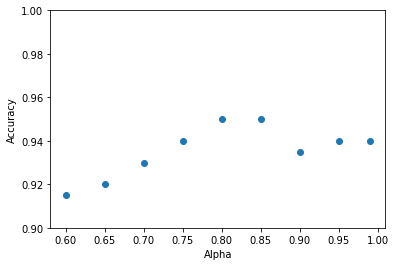

In [ ]:
score1=PCA(0.6,Centered,U,EigenValues,1)
score2=PCA(0.65,Centered,U,EigenValues,1)
score3=PCA(0.7,Centered,U,EigenValues,1)
score4=PCA(0.75,Centered,U,EigenValues,1)
score5=PCA(0.8,Centered,U,EigenValues,1)
score6=PCA(0.85,Centered,U,EigenValues,1)
score7=PCA(0.9,Centered,U,EigenValues,1)
score8=PCA(0.95,Centered,U,EigenValues,1)
score9=PCA(0.99,Centered,U,EigenValues,1)
alphas=np.array([0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,0.99])
scores=[score1,score2,score3,score4,score5,score6,score7,score8,score9]
plt.scatter(alphas,scores)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1)
plt.show()

**LDA**


**Computing Sb And B**

In [ ]:
#The train set (odd matrix)
x=Dodd
y=labelodd
#Adding the The label to the matrix
D=np.append(x,y,axis=1)
temp3=np.zeros(10304)
temp4=np.zeros(10304)
for i in range(40):
  # Dnew = the matrix where label = (i+1)
  Dnew=D[D[:,10304]==(i+1)]
  Dnew=np.delete(Dnew,10304,1)
  Mean=np.mean(Dnew, axis=0)
  if(i==0):
    Z=Dnew-Mean
    S=np.dot(Z.T,Z)
  else:
    Z=Dnew-Mean
    temp5=np.dot(Z.T,Z)
    S=S+temp5
  temp3=np.row_stack((temp3,Mean))

In [ ]:
nk=Dnew.shape[0]
Means=temp3[1:]
for i in range(40):
  Mu=Means[i,:]
  DeltaMu=np.mean(x,axis=0)
  if(i==0):
    Sb=nk*np.outer((Mu-DeltaMu),(Mu-DeltaMu).T)
  else:
    Temp=nk*np.outer((Mu-DeltaMu),(Mu-DeltaMu).T)
    Sb=Sb+Temp


Computing S inverse

In [ ]:
Sinv=np.linalg.inv(S)

Computing eigen values of S inverse * B and sorting both eigen value matrix and eigen vectors

In [ ]:
U=np.dot(Sinv,Sb)
w2,v2=np.linalg.eigh(U)
idx2 = w2.argsort()[::-1]
EigenValues=w2[idx2]
EigenVectors=v2[:,idx2]


Training and Testing LDA and reprorting the accuracy

In [ ]:
U=EigenVectors[:,0:39]
meantrain = np.mean(Dodd, axis=0)
meantest= np.mean(Deven,axis=0)
Centertrain=Dodd-meantrain
X_train=np.dot(U.T,Centertrain.T).T
Y_train=labelodd
Centertest=Deven-meantest
X_test=np.dot(U.T,Centertest.T).T
Y_test=labeleven
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train,Y_train.ravel())
y_pred = classifier.predict(X_test)
ScoreLDA = metrics.accuracy_score(Y_test,y_pred)
print('The accuracy = '+str(ScoreLDA))

The accuracy = 0.95


Comparing the results of the LDA AND PCA

In [ ]:
for x in range(len(scores)):
  # print(x)
  if(scores[x] >= ScoreLDA):
    print('At Alpha +'+str(alphas[x])+' PCA had more accuracy than LDA')
  else:
    print('At Alpha +'+str(alphas[x])+' LDA had more accuracy than PCA')

At Alpha +0.6 LDA had more accuracy than PCA
At Alpha +0.65 LDA had more accuracy than PCA
At Alpha +0.7 LDA had more accuracy than PCA
At Alpha +0.75 LDA had more accuracy than PCA
At Alpha +0.8 PCA had more accuracy than LDA
At Alpha +0.85 PCA had more accuracy than LDA
At Alpha +0.9 LDA had more accuracy than PCA
At Alpha +0.95 LDA had more accuracy than PCA
At Alpha +0.99 LDA had more accuracy than PCA


Plotting the accuracy with different number of Neighbours in LDA

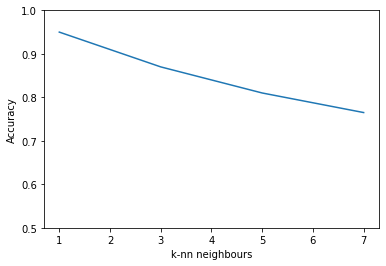

In [ ]:
score=[]
for i in range(1, 8, 2) :
    classifier = KNeighborsClassifier(i)
    classifier.fit(X_train,Y_train.ravel())
    y_pred = classifier.predict(X_test)
    score.append(metrics.accuracy_score(Y_test,y_pred))
iz=np.array([1,3,5,7])
plt.plot(iz,score)
plt.xlabel("k-nn neighbours")
plt.ylabel("Accuracy")
plt.ylim(0.5, 1)
plt.show()

Plotting the accuracy with different number of Neighbours and Alphas in PCA

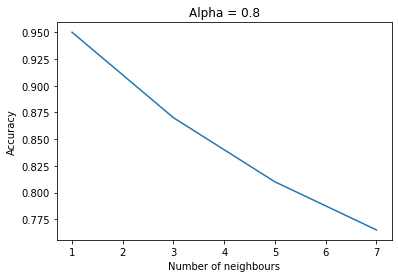

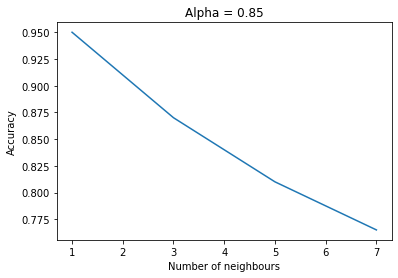

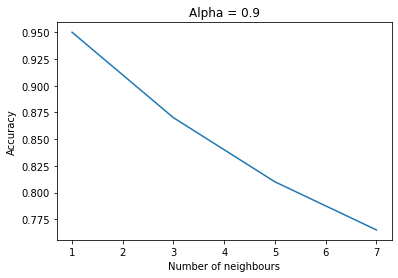

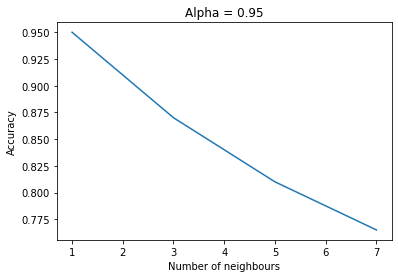

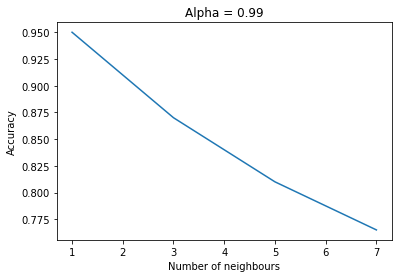

In [ ]:
Alphaz=[0.8,0.85,0.9,0.95,0.99]
Ks=[1,3,5,7]
maxaccuracy=0
for j in Alphaz:
  Accuracy=[]
  K=[]
  for k in Ks:
    scorez=PCA(j,Centered,U,EigenValues,k)
    if(scorez>maxaccuracy):
      maxaccuracy=scorez
      Alphamax=j
      KMax=k
    Accuracy.append(scorez)
    # print("At Alpha= "+str(j)+"And K= "+str(k)+"Score = " +str(scorez))
  plt.plot(Ks,Accuracy)
  plt.xlabel('Number of neighbours')
  plt.ylabel('Accuracy')
  plt.title('Alpha = '+ str(j) )
  plt.show()

PCA TUNING

In [ ]:
print('Reporting Max accuracy of '+str(maxaccuracy)  +' at Alpha= '+ str(Alphamax)+ ' and K = '+ str(KMax))

Reporting Max accuracy of 0.95 at Alpha= 0.8 and K = 1


LDA TUNING

In [ ]:
meantrain = np.mean(Dodd, axis=0)
meantest= np.mean(Deven,axis=0)
Centertrain=Dodd-meantrain
Y_train=labelodd
Centertest=Deven-meantest
Y_test=labeleven
Ks=[1,3,5,7]
max=0
for i in range (1,10304):
  U=EigenVectors[:,0:i]
  X_train=np.dot(U.T,Centertrain.T).T
  X_test=np.dot(U.T,Centertest.T).T
  for k in Ks:
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(X_train,Y_train.ravel())
    y_pred = classifier.predict(X_test)
    ScoreLDA = metrics.accuracy_score(Y_test,y_pred)
    if(ScoreLDA>max):
      max=ScoreLDA
      KMax=k
      NumberEigen=i




In [ ]:
print('Reporting Max accuracy of '+str(max)  +' with number of eigenvectors= '+ str(NumberEigen)+ ' and K = '+ str(KMax))

Reporting Max accuracy of 0.96 with number of eigenvectors= 224 and K = 1


Faces Vs non-faces

importing the non-face images (cars)

In [ ]:
!unzip /content/gdrive/MyDrive/Cars.zip

Archive:  /content/gdrive/MyDrive/Cars.zip
replace 448.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Resizing and converting the images to a readable dataset

In [ ]:
temp7=np.zeros(10304)
for i in range(4,404):
  # Path to the file
  x='/content/'+str(i)+'.jpg'
  img = Image.open(x)
  img=img.resize((92,112))
  img=img.convert('L')
  # Inserting the data of the image in a matrix
  numpydata2 = np.asarray(img)
  result = numpydata2.flatten()
  temp7=np.row_stack((temp7,result))
# Deleting the first zeros row
NF=temp7[1:]

splitting the dataset into training and testing sets

In [ ]:
NFodd=NF[::2]
NFeven=NF[1::2]
Fodd=Dodd
Feven=Deven

computing the B and S

In [ ]:
FaceMean=np.mean(Fodd, axis=0)
NoFaceMean=np.mean(NFodd, axis=0)
CenteredF=Fodd-FaceMean
CenteredNF=NFodd-NoFaceMean
Diff=FaceMean-NoFaceMean
B=np.outer(Diff,Diff.T)
Z1=np.dot(CenteredF.T,CenteredF)
Z2=np.dot(CenteredNF.T,CenteredNF)
S2=Z1+Z2

In [ ]:
Sinv=np.linalg.inv(S2)

Computing the Eigen values and eigen vectors and sosrting them descendingly

In [ ]:
U=np.dot(Sinv,B)
w3,v3=np.linalg.eigh(U)
idx3 = w3.argsort()[::-1]
EigenValues=w3[idx3]
EigenVectors=v3[:,idx3]

row_stacking the training set together with choosing only 1 eigen vector



In [ ]:
U=EigenVectors[:,0:1]
x_train=np.row_stack((NFodd,Fodd))
x_test=np.row_stack((NFeven,Feven))
zeros=np.zeros(200,)
ones=np.ones(200,)
y_train=np.append(zeros,ones,axis=0)
x_train=np.dot(U.T,x_train.T).T
x_test=np.dot(U.T,x_test.T).T
y_test=y_train

Testing the faces-nonfaces accuracy

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
ScoreLDA = metrics.accuracy_score(y_test,y_pred)
print('The accuracy = '+str(ScoreLDA))

The accuracy = 0.7975


Confusion matrix

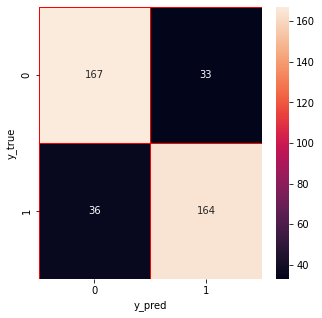

In [ ]:
cm= metrics.confusion_matrix(y_test, y_pred)
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Fixing the number of faces (200-200) while changing number of non-faces

In [ ]:
def NFF(i):
  # Splitting the non-faces training set
  NFtrain=NF[:i]
  NFtest=NF[i:]
  # computing the mean of faces set
  FaceMean=np.mean(Fodd, axis=0)
  # computing the mean of non-faces set
  NoFaceMean=np.mean(NFtrain, axis=0)
  # computing centered values for faces and non faces set
  CenteredF=Fodd-FaceMean
  CenteredNF=NFtrain-NoFaceMean
  Diff=FaceMean-NoFaceMean
  # computing B and And S
  B=np.outer(Diff,Diff.T)
  Z1=np.dot(CenteredF.T,CenteredF)
  Z2=np.dot(CenteredNF.T,CenteredNF)
  S2=Z1+Z2
  Sinv=np.linalg.inv(S2)
  # Sinv @ B
  U=np.dot(Sinv,B)
  # computing eigen values,vectors and sorting them
  w3,v3=np.linalg.eigh(U)
  idx3 = w3.argsort()[::-1]
  EigenValues=w3[idx3]
  EigenVectors=v3[:,idx3]
  U=EigenVectors[:,0:1]
  x_train=np.row_stack((NFtrain,Fodd))
  x_test=np.row_stack((NFtest,Feven))
  zeros=np.zeros(i,)
  ones=np.ones(200,)
  y_train=np.append(zeros,ones,axis=0)
  x_train=np.dot(U.T,x_train.T).T
  x_test=np.dot(U.T,x_test.T).T
  zeros2=np.zeros(400-i,)
  y_test=np.append(zeros2,ones,axis=0)
  # Testing the set and computing the accuracy
  classifier = KNeighborsClassifier(n_neighbors=1)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  ScoreLDA = metrics.accuracy_score(y_test,y_pred)
  return ScoreLDA

training on different sets of non-face images (50,100,150,200,250,300)

In [ ]:
score1=NFF(50)
score2=NFF(100)
score3=NFF(150)
score4=NFF(200)
score5=NFF(250)
score6=NFF(300)
scorez=[score1,score2,score3,score4,score5,score6]

plotting the relation between number of non-face images and accuracy

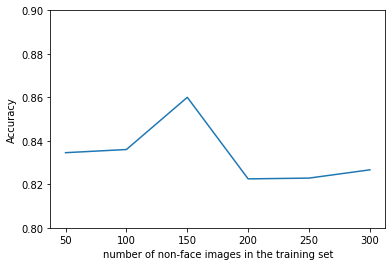

In [ ]:
samples=[50,100,150,200,250,300]
plt.plot(samples,scorez)
plt.xlabel("number of non-face images in the training set")
plt.ylabel("Accuracy")
plt.ylim(0.8, 0.9)
plt.show()

**Bonus**

In [ ]:
# Splitting the data to 70% training & 30% testing

ntrain_set = D[:7]
ntrain_label = labels[:7]
ntest_set = D[7:10]
ntest_label = labels[7:10]
i = 17
j = 10

# Computing the first 7 of each class to training data and the last 3 for testing

for x in range(1,40):
    ntrain_set = np.vstack((ntrain_set,data[i-7:i]))
    ntrain_label = np.vstack((ntrain_label,labels[i-7:i]))
    ntest_set = np.vstack((ntest_set,data[j-3:j]))
    ntest_label = np.vstack((ntest_label,labels[j-3:j]))
    i += 10
    j += 10
# Extracting eigenvectors and eigen values for PCA

centerd  =  ntrain_set - ntrain_set.mean(axis = 0)
np.cov(cdata_train.T,bias=True)
val , vec = np.linalg.eigh(np.cov(centerd.T,bias=True))
idx = val.argsort()[::-1]
EigenValues = val[idx]
EigenVectors = vec[:,idx]

In [ ]:
U = EigenVectors
ntest_label = ntest_label.reshape(120)
Alpha = np.array([0.8,0.85,0.9,0.95])
centerd2 = ntest_set - ntest_set.mean(axis = 0)
values = []
total = np.sum(EigenValues)
nscore = []

# Finding the number of dominnant eigenvectors corsponding to Alpha's values

for j in Alpha:
    sum = 0
    for i in range(len(EigenValues)):
        sum += EigenValues[i]
        if sum/total > j:
            values.append(i+1)
            break

# Compute the accuracy score for each selected number of dominnant eigenvectors

for i in range(len(values)):
    training_data = np.dot(U[:,:values[i]].T,centerd.T).T
    test_data = np.dot(U[:,:values[i]].T,centerd2.T).T
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(training_data, ntrain_label.ravel())
    y_pred = classifier.predict(test_data)
    nscore.append(metrics.accuracy_score(ntest_label,y_pred))
nscore

In [ ]:
plt.scatter(Alpha,nscore)
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1)
plt.show()

In [ ]:
Mu = []
i = 7

# Getting the mean of each class on its own

for j in range(40):
        m = ntrain_set[i-7:i].mean(axis=0)
        Mu.append(m)
        i=i+7
Mu = np.array(Mu)
M = ntrain_set.mean(axis=0)
sb = 5*(np.outer((Mu[0]-M),(Mu[0]-M).T))

# Computing the Sb variable from the subtraction of total mean from each class mean

for i in range(40):
    if i == 0:
        continue
    else:
        temp = 5*(np.outer((Mu[i]-M),(Mu[i]-M).T))
        sb = sb + temp

In [ ]:
s = np.zeros((10304,10304))
temp = np.dot((ntrain_set[0:7]-M).T, (ntrain_set[0:7]-M) )
s = s + temp
i = 14

# Extracting the s value

if i in range(1,40):
    temp = np.dot((ntrain_set[i-7:i]-M).T, (ntrain_set[i-7:i]-M) )
    s = s + temp
    i += 7

In [ ]:
Sinv=np.linalg.inv(s)

In [ ]:
U=np.dot(Sinv,sb)
w2,v2=np.linalg.eigh(U)
idx2 = w2.argsort()[::-1]
EigenValues=w2[idx2]
EigenVectors=v2[:,idx2]
EigenVectors

In [ ]:
Projection=EigenVectors[:,0:39]
ntrain_label = ntrain_label.reshape(280)
meantrain = np.mean(ntrain_set, axis=0)
meantest= np.mean(ntest_set,axis=0)
Centertrain = ntrain_set - meantrain
X_train=np.dot(Projection.T,Centertrain.T).T
Y_train= ntrain_label
Centertest = ntest_set-meantest
X_test=np.dot(Projection.T,Centertest.T).T
Y_test= ntest_label
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
nScoreLDA = metrics.accuracy_score(Y_test,y_pred)
print(nScoreLDA)

In [ ]:
plt.scatter(nScoreLDA,ScoreLDA)
plt.xlabel("LDA accuracy in 70:30 split")
plt.ylabel("LDA accuracy in 50:50 split")
plt.ylim(0.9, 1)
plt.xlim(0.9, 1)
plt.show()